In [1]:
import os, sys
import numpy as np
import pyvista as pv
import matplotlib.pyplot as plt
from scipy.constants import c as c_light
from scipy.constants import mu_0

from wakis import SolverFIT3D
from wakis import GridFIT3D 
from wakis import WakeSolver

In [2]:
conductivities = [10, 100, 1000, 1e4, 1e5, 1e6, 1e7, 1e8]
nmesh = [1.25, 1.5, 2]
for cond in conductivities:
    print(f'Simulating with conductivity: {int(cond)}')
    print('-----------------------------------------')
    # ---------- Domain setup ---------
    # Number of mesh cells
    Nx = 60*1.5
    Ny = 60*1.5
    Nz = 150*1.5
    print(f'Total number of cells: {Nx}x{Ny}x{Nz} = {Nx*Ny*Nz}')
    #dt = 5.707829241e-12 # CST

    # Embedded boundaries
    stl_cavity = 'cavity.stl' 
    stl_shell = 'shell.stl'
    surf = pv.read(stl_shell)
    
    stl_solids = {'cavity': stl_cavity, 'shell': stl_shell}
    stl_materials = {'cavity': 'vacuum', 'shell': [cond, 1.0, cond]}
    
    # Domain bounds
    xmin, xmax, ymin, ymax, zmin, zmax = surf.bounds
    Lx, Ly, Lz = (xmax-xmin), (ymax-ymin), (zmax-zmin)
    
    # set grid and geometry
    grid = GridFIT3D(xmin, xmax, ymin, ymax, zmin, zmax, int(Nx), int(Ny), int(Nz), 
                    stl_solids=stl_solids, 
                    stl_materials=stl_materials)

    Z0 = c_light*mu_0
    cond_eff = (2*(grid.L[:, :, :, 'Abs'].min()*grid.iA[:, :, :, 'Abs'].min())/Z0)*np.sqrt(cond)
    grid.stl_materials['shell'] = [cond_eff, 1.0, cond_eff]
    
    # ------------ Beam source ----------------
    # Beam parameters
    sigmaz = 5e-2       #[m] -> 2 GHz
    q = 1e-9            #[C]
    beta = 1.0          # beam beta TODO
    xs = 0.             # x source position [m]
    ys = 0.             # y source position [m]
    xt = 0.             # x test position [m]
    yt = 0.             # y test position [m]
    # [DEFAULT] tinj = 8.53*sigmaz/c_light  # injection time offset [s] 
    
    # Simualtion
    wakelength = 100. #[m]
    add_space = 30   # no. cells

    results_folder = f'results_cond{int(cond)}_WL{int(wakelength)}_Z0_N1.5/'
    wake = WakeSolver(q=q, sigmaz=sigmaz, beta=beta,
                xsource=xs, ysource=ys, xtest=xt, ytest=yt,
                add_space=add_space, results_folder=results_folder,
                Ez_file=results_folder+'Ez.h5')
    
    # ----------- Solver & Simulation ----------
    # boundary conditions``
    bc_low=['pec', 'pec', 'pec']
    bc_high=['pec', 'pec', 'pec']
    
    solver = SolverFIT3D(grid, wake,
                         bc_low=bc_low, bc_high=bc_high, 
                         use_stl=True, 
                         use_gpu=True,
                         bg='pec')
    
    # Run wakefield time-domain simulation
    solver.wakesolve(wakelength=wakelength)

Simulating with conductivity: 10
-----------------------------------------
Total number of cells: 60x60x150 = 540000
Generating grid...
Importing STL solids...
Assembling operator matrices...
Applying boundary conditions...
Adding material tensors...
Calculating maximal stable timestep...
Pre-computing...
Moving to GPU...
Total initialization time: 1.1267738342285156 s
Running electromagnetic time-domain simulation...


100%|██████████| 62211/62211 [02:41<00:00, 384.74it/s]


Reading h5 file results_cond10_WL100_Z0/Ez.h5
Calculating longitudinal wake potential WP(s)


100%|██████████| 555732/555732 [02:54<00:00, 3184.11it/s] 


Calculating transverse wake potential WPx, WPy...


100%|██████████| 555732/555732 [00:06<00:00, 84083.63it/s] 


Calculating longitudinal impedance Z...
Calculating transverse impedance Zx, Zy...
Simulating with conductivity: 100
-----------------------------------------
Total number of cells: 60x60x150 = 540000
Generating grid...
Importing STL solids...
Assembling operator matrices...
Applying boundary conditions...
Adding material tensors...
Calculating maximal stable timestep...
Pre-computing...
Moving to GPU...
Total initialization time: 0.8379819393157959 s
Running electromagnetic time-domain simulation...


100%|██████████| 62211/62211 [02:35<00:00, 401.28it/s]


Reading h5 file results_cond100_WL100_Z0/Ez.h5
Calculating longitudinal wake potential WP(s)


100%|██████████| 555732/555732 [05:17<00:00, 1748.49it/s] 


Calculating transverse wake potential WPx, WPy...


100%|██████████| 555732/555732 [00:06<00:00, 84930.20it/s] 


Calculating longitudinal impedance Z...
Calculating transverse impedance Zx, Zy...
Simulating with conductivity: 1000
-----------------------------------------
Total number of cells: 60x60x150 = 540000
Generating grid...
Importing STL solids...
Assembling operator matrices...
Applying boundary conditions...
Adding material tensors...
Calculating maximal stable timestep...
Pre-computing...
Moving to GPU...
Total initialization time: 0.9037909507751465 s
Running electromagnetic time-domain simulation...


100%|██████████| 62211/62211 [02:39<00:00, 390.71it/s]


Reading h5 file results_cond1000_WL100_Z0/Ez.h5
Calculating longitudinal wake potential WP(s)


100%|██████████| 555732/555732 [03:09<00:00, 2936.72it/s] 


Calculating transverse wake potential WPx, WPy...


100%|██████████| 555732/555732 [00:06<00:00, 85726.25it/s] 


Calculating longitudinal impedance Z...
Calculating transverse impedance Zx, Zy...
Simulating with conductivity: 10000
-----------------------------------------
Total number of cells: 60x60x150 = 540000
Generating grid...
Importing STL solids...
Assembling operator matrices...
Applying boundary conditions...
Adding material tensors...
Calculating maximal stable timestep...
Pre-computing...
Moving to GPU...
Total initialization time: 0.8718440532684326 s
Running electromagnetic time-domain simulation...


100%|██████████| 62211/62211 [02:47<00:00, 370.92it/s]


Reading h5 file results_cond10000_WL100_Z0/Ez.h5
Calculating longitudinal wake potential WP(s)


100%|██████████| 555732/555732 [03:26<00:00, 2685.77it/s] 


Calculating transverse wake potential WPx, WPy...


100%|██████████| 555732/555732 [00:06<00:00, 85728.80it/s] 


Calculating longitudinal impedance Z...
Calculating transverse impedance Zx, Zy...
Simulating with conductivity: 100000
-----------------------------------------
Total number of cells: 60x60x150 = 540000
Generating grid...
Importing STL solids...
Assembling operator matrices...
Applying boundary conditions...
Adding material tensors...
Calculating maximal stable timestep...
Pre-computing...
Moving to GPU...
Total initialization time: 0.8738837242126465 s
Running electromagnetic time-domain simulation...


100%|██████████| 62211/62211 [02:51<00:00, 362.43it/s]


Reading h5 file results_cond100000_WL100_Z0/Ez.h5
Calculating longitudinal wake potential WP(s)


100%|██████████| 555732/555732 [02:52<00:00, 3221.82it/s] 


Calculating transverse wake potential WPx, WPy...


100%|██████████| 555732/555732 [00:06<00:00, 85480.90it/s] 


Calculating longitudinal impedance Z...
Calculating transverse impedance Zx, Zy...
Simulating with conductivity: 1000000
-----------------------------------------
Total number of cells: 60x60x150 = 540000
Generating grid...
Importing STL solids...
Assembling operator matrices...
Applying boundary conditions...
Adding material tensors...
Calculating maximal stable timestep...
Pre-computing...
Moving to GPU...
Total initialization time: 0.8523733615875244 s
Running electromagnetic time-domain simulation...


100%|██████████| 62211/62211 [02:32<00:00, 407.09it/s]


Reading h5 file results_cond1000000_WL100_Z0/Ez.h5
Calculating longitudinal wake potential WP(s)


100%|██████████| 555732/555732 [02:55<00:00, 3169.97it/s] 


Calculating transverse wake potential WPx, WPy...


100%|██████████| 555732/555732 [00:06<00:00, 84785.03it/s] 


Calculating longitudinal impedance Z...
Calculating transverse impedance Zx, Zy...
Simulating with conductivity: 10000000
-----------------------------------------
Total number of cells: 60x60x150 = 540000
Generating grid...
Importing STL solids...
Assembling operator matrices...
Applying boundary conditions...
Adding material tensors...
Calculating maximal stable timestep...
Pre-computing...
Moving to GPU...
Total initialization time: 0.9270613193511963 s
Running electromagnetic time-domain simulation...


100%|██████████| 62211/62211 [02:35<00:00, 400.88it/s]


Reading h5 file results_cond10000000_WL100_Z0/Ez.h5
Calculating longitudinal wake potential WP(s)


100%|██████████| 555732/555732 [02:52<00:00, 3227.97it/s] 


Calculating transverse wake potential WPx, WPy...


100%|██████████| 555732/555732 [00:06<00:00, 86083.28it/s] 


Calculating longitudinal impedance Z...
Calculating transverse impedance Zx, Zy...
Simulating with conductivity: 100000000
-----------------------------------------
Total number of cells: 60x60x150 = 540000
Generating grid...
Importing STL solids...
Assembling operator matrices...
Applying boundary conditions...
Adding material tensors...
Calculating maximal stable timestep...
Pre-computing...
Moving to GPU...
Total initialization time: 0.8780393600463867 s
Running electromagnetic time-domain simulation...


100%|██████████| 62211/62211 [02:35<00:00, 399.55it/s]


Reading h5 file results_cond100000000_WL100_Z0/Ez.h5
Calculating longitudinal wake potential WP(s)


100%|██████████| 555732/555732 [02:54<00:00, 3183.44it/s] 


Calculating transverse wake potential WPx, WPy...


100%|██████████| 555732/555732 [00:06<00:00, 80892.68it/s] 


Calculating longitudinal impedance Z...
Calculating transverse impedance Zx, Zy...


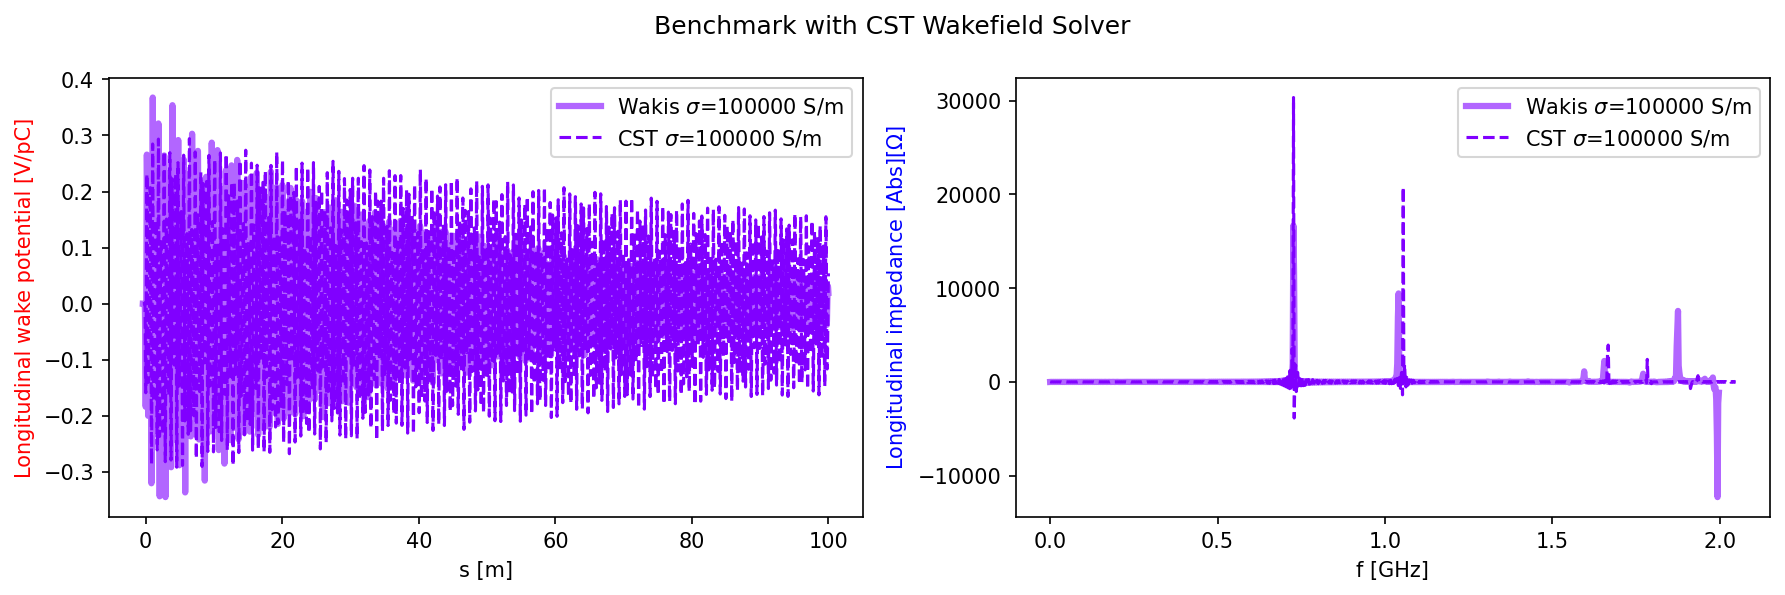

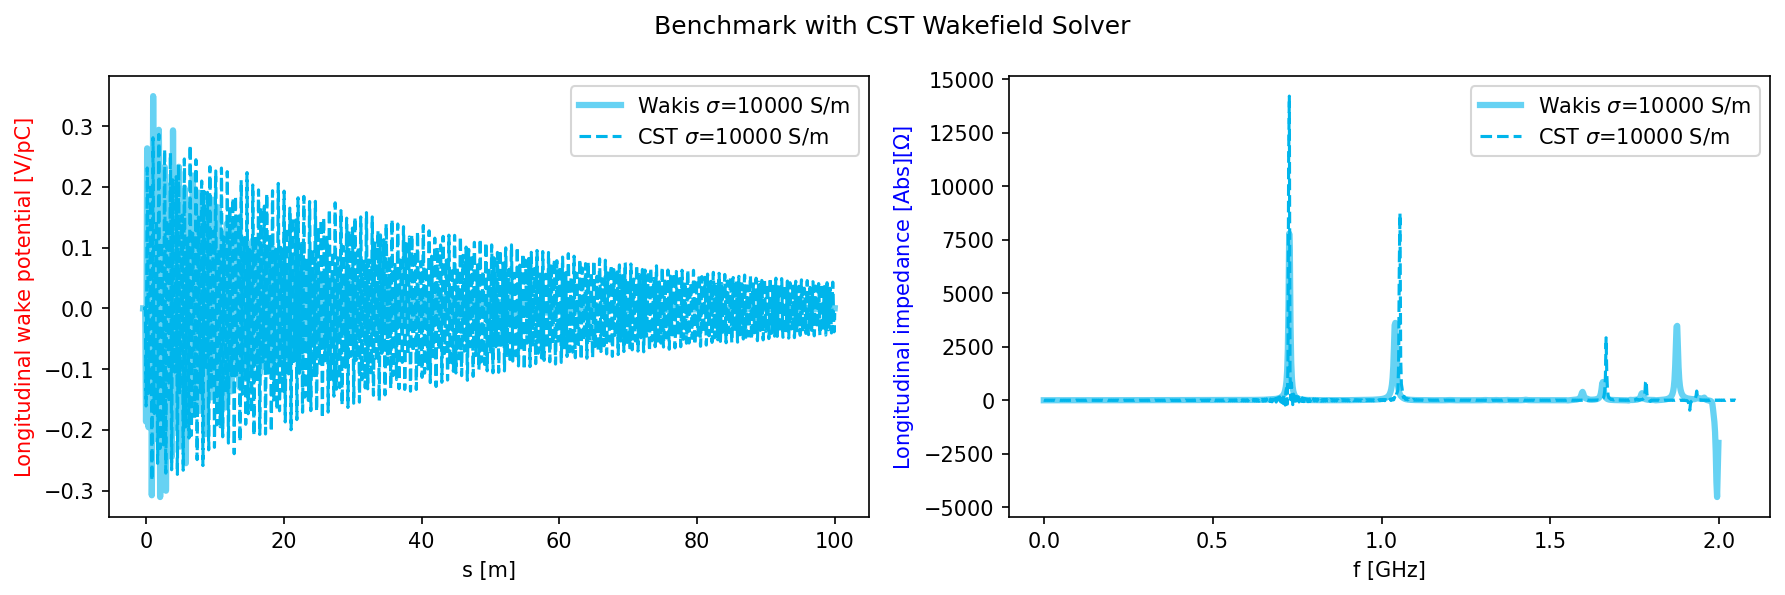

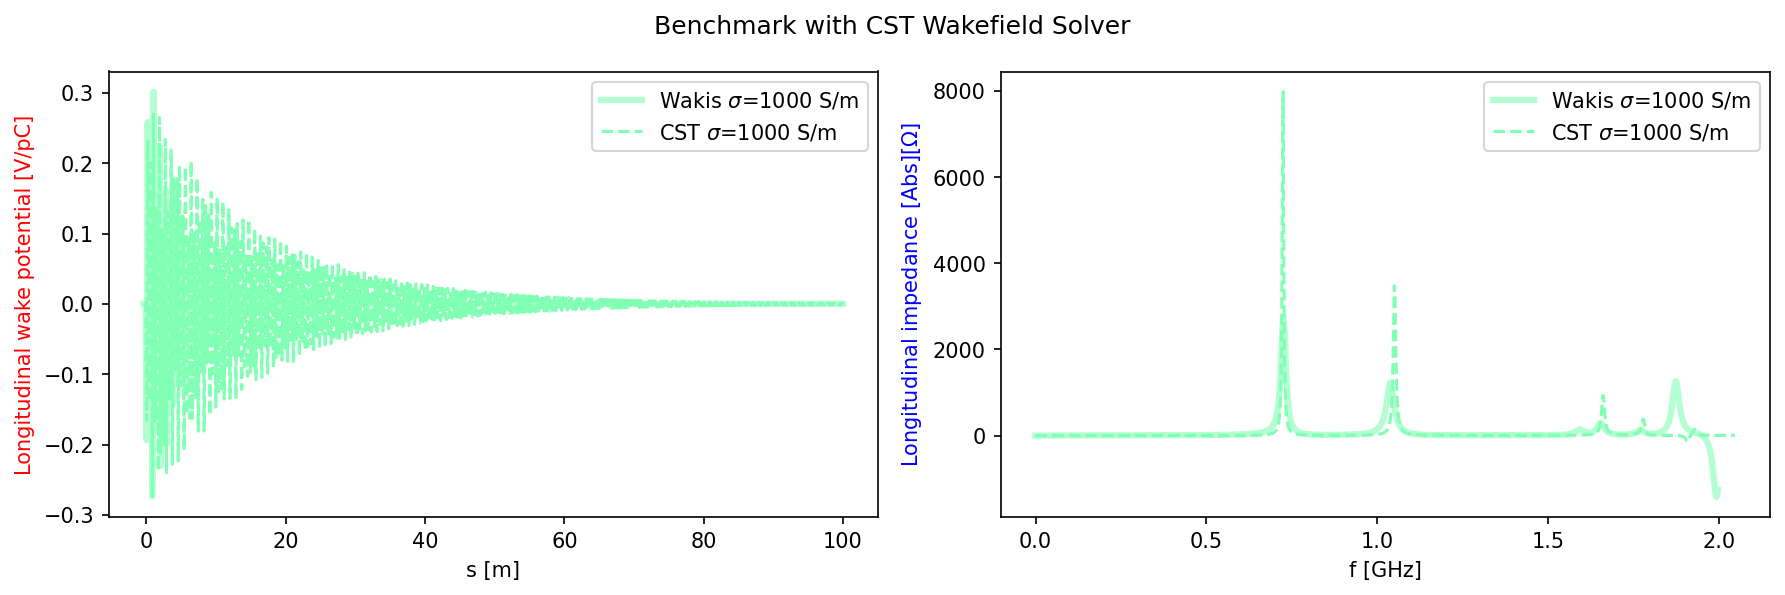

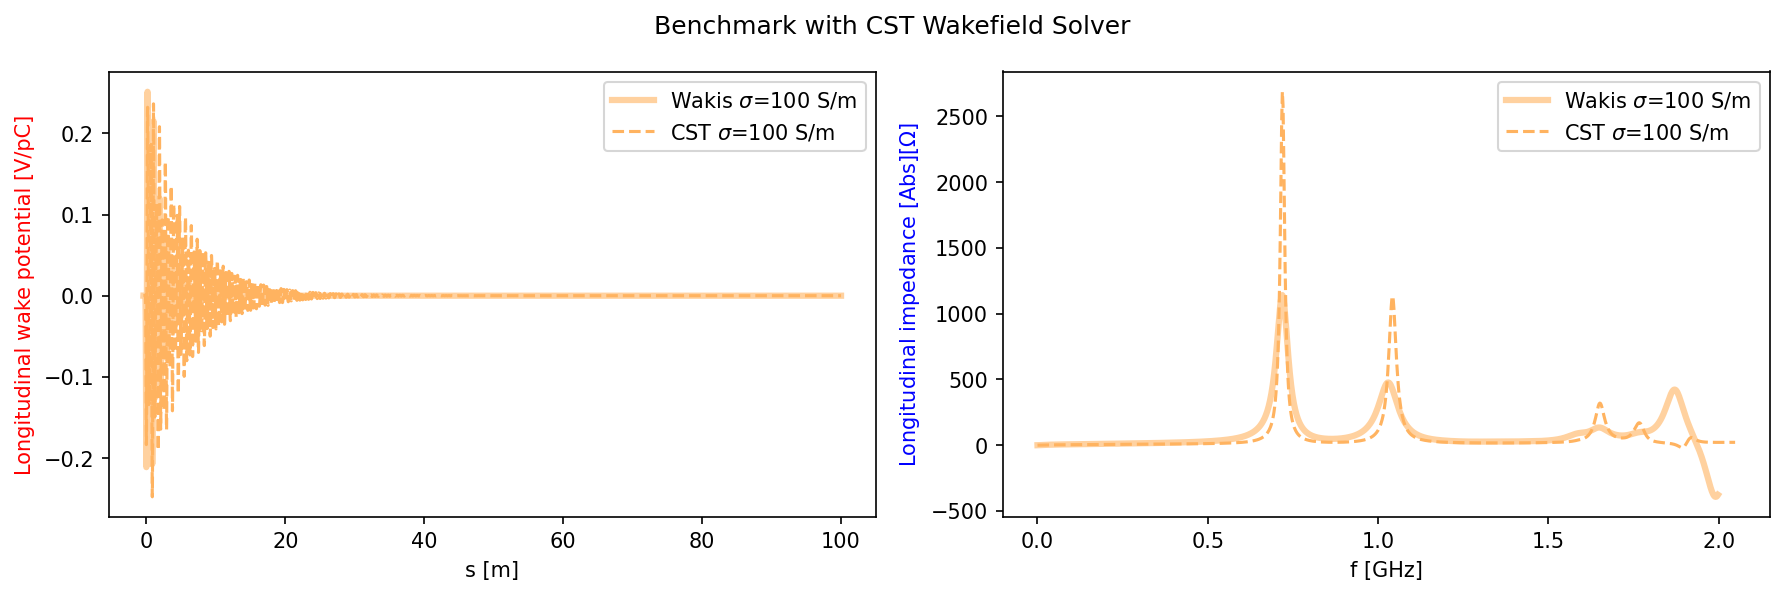

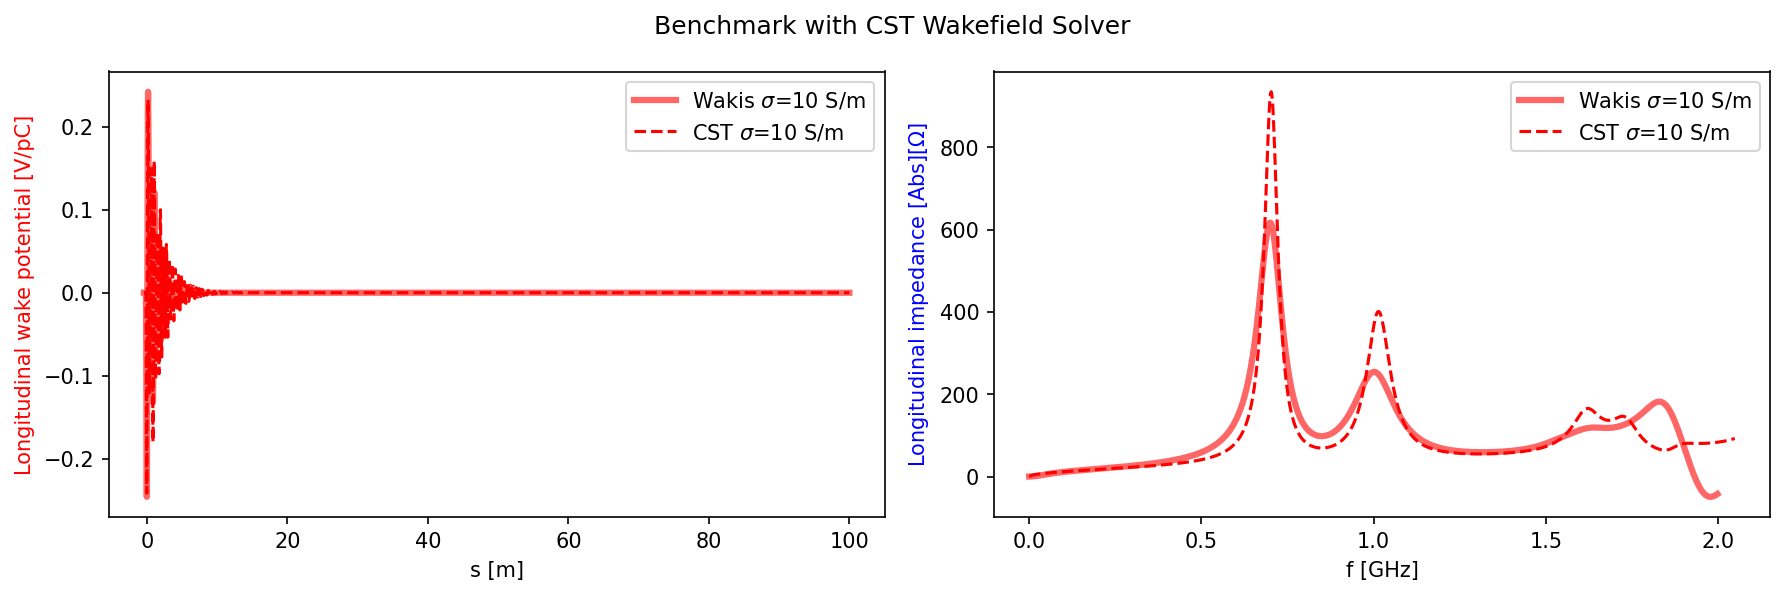

In [3]:
# Compare with CST
import matplotlib as mpl

wake = WakeSolver()
conds = [10, 100, 1000, 10000, 100000]
res = {}
cstWP, cstZ = {}, {}
colors = mpl.colormaps['rainbow'](np.linspace(0., 1.0, len(conds)))
for k, cond in enumerate(reversed(conds)):
    fig, ax = plt.subplots(1,2, figsize=[12,4], dpi=150)
    res[k] = wake.copy()
    res[k].load_results(f'results_cond{cond}_WL100_sqrt/')
    cstWP[k] = wake.read_txt(f'cst/WP_sigma{cond}.txt')
    cstZ[k] = wake.read_txt(f'cst/Z_sigma{cond}.txt')

    ax[0].plot(res[k].s, res[k].WP, c=colors[k], lw=3, alpha=0.6, label=f'Wakis $\sigma$={cond} S/m')
    ax[0].plot(cstWP[k][0]*1e-2, cstWP[k][1], c=colors[k], ls='--', lw=1.5, label=f'CST $\sigma$={cond} S/m')

    ax[1].plot(res[k].f*1e-9, res[k].Z.real, c=colors[k], lw=3, alpha=0.6, label=f'Wakis $\sigma$={cond} S/m')
    ax[1].plot(cstZ[k][0], cstZ[k][1].real, c=colors[k], ls='--', lw=1.5, label=f'CST $\sigma$={cond} S/m')

    ax[0].set_xlabel('s [m]')
    ax[0].set_ylabel('Longitudinal wake potential [V/pC]', color='r')
    ax[0].legend()
    
    ax[1].set_xlabel('f [GHz]')
    ax[1].set_ylabel('Longitudinal impedance [Abs][$\Omega$]', color='b')
    ax[1].legend()
    
    fig.suptitle('Benchmark with CST Wakefield Solver')
    fig.tight_layout()
    fig.savefig(f'benchmark_cond{cond}.png')


In [ ]:
# Compare with Wakis
import matplotlib as mpl

wake = WakeSolver()
conds = [10, 100, 1000, 10000, 100000, 1000000]
res = {}
res2 = {}
colors = mpl.colormaps['rainbow'](np.linspace(0., 1.0, len(conds)))
for k, cond in enumerate(reversed(conds)):
    fig, ax = plt.subplots(1,2, figsize=[12,4], dpi=150)
    res[k] = wake.copy()
    res[k].load_results(f'results_cond{cond}_WL100_sqrt/')

    res2[k] = wake.copy()
    res2[k].load_results(f'results_cond{cond}_WL100/')
    
    #cstWP[k] = wake.read_txt(f'cst/WP_sigma{cond}.txt')
    #cstZ[k] = wake.read_txt(f'cst/Z_sigma{cond}.txt')

    ax[0].plot(res[k].s, res[k].WP, c=colors[k], lw=3, alpha=0.3, label=f'Wakis $\sigma$={cond} S/m')
    ax[0].plot(res2[k].s, res2[k].WP, c=colors[k], ls='--', lw=1.5, label=f'Wakis eps=0.5 $\sigma$={cond} S/m')

    ax[1].plot(res[k].f*1e-9, res[k].Z.real, c=colors[k], lw=3, alpha=0.3, label=f'Wakis $\sigma$={cond} S/m')
    ax[1].plot(res2[k].f*1e-9, res2[k].Z.real, c=colors[k], ls='--', lw=1.5, label=f'Wakis eps=0.5 $\sigma$={cond} S/m')

    ax[0].set_xlabel('s [m]')
    ax[0].set_ylabel('Longitudinal wake potential [V/pC]', color='r')
    ax[0].legend()
    
    ax[1].set_xlabel('f [GHz]')
    ax[1].set_ylabel('Longitudinal impedance [Abs][$\Omega$]', color='b')
    ax[1].legend()
    
    fig.suptitle('Benchmark with CST Wakefield Solver')
    fig.tight_layout()
    fig.savefig(f'benchmark_cond{cond}.png')
